✅Let's do simple credit scoring via Decision Trees

In [1]:
# import all necessary libraries
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.inspection import DecisionBoundaryDisplay

from sklearn.tree import DecisionTreeClassifier

✅Load and Explore Data

In [2]:
data = pd.read_csv('Credit Score Classification Dataset.csv')

In [3]:
data.head()

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25,Female,50000,Bachelor's Degree,Single,0,Rented,High
1,30,Male,100000,Master's Degree,Married,2,Owned,High
2,35,Female,75000,Doctorate,Married,1,Owned,High
3,40,Male,125000,High School Diploma,Single,0,Owned,High
4,45,Female,100000,Bachelor's Degree,Married,3,Owned,High


In [4]:
data.describe()

,Age,Income,Number of Children
count,164.000000,164.000000,164.000000
mean,37.975610,83765.243902,0.652439
std,8.477289,32457.306728,0.883346
min,25.000000,25000.000000,0.000000
25%,30.750000,57500.000000,0.000000
50%,37.000000,83750.000000,0.000000
75%,45.000000,105000.000000,1.000000
max,53.000000,162500.000000,3.000000


In [5]:
data.select_dtypes('object').describe()

,Gender,Education,Marital Status,Home Ownership,Credit Score
count,164,164,164,164,164
unique,2,5,2,2,3
top,Female,Bachelor's Degree,Married,Owned,High
freq,86,42,87,111,113


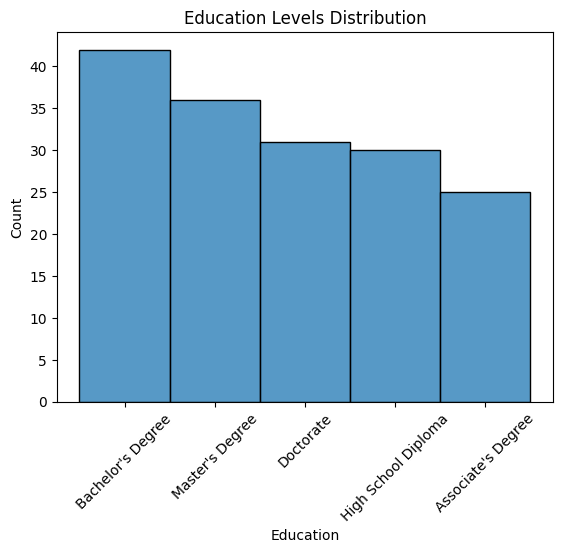

In [6]:
sns.histplot(data['Education'])
plt.xticks(rotation=45)
plt.title('Education Levels Distribution')
plt.show()

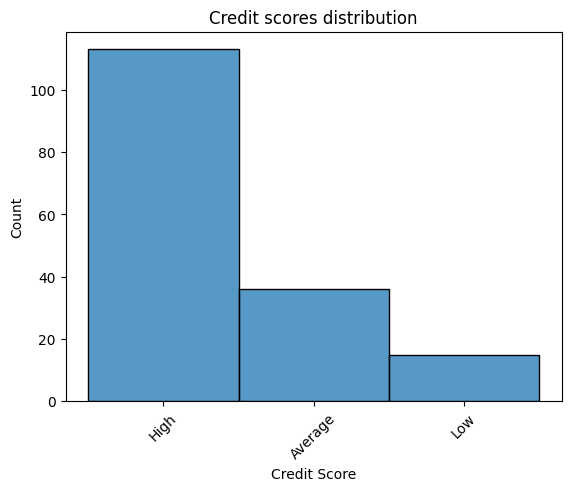

In [7]:
sns.histplot(data['Credit Score'])
plt.xticks(rotation=45)
plt.title('Credit scores distribution')
plt.show()

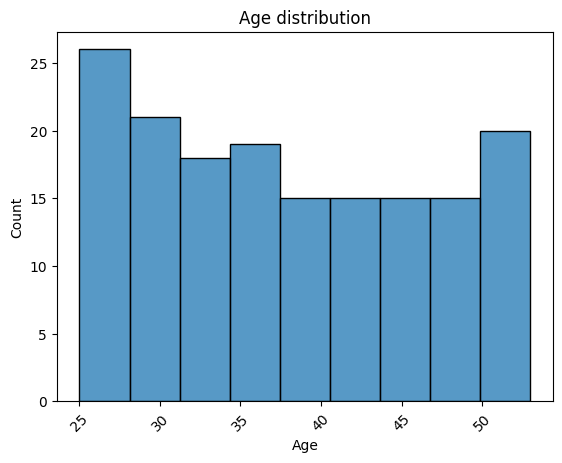

In [8]:
sns.histplot(data['Age'])
plt.xticks(rotation=45)
plt.title('Age distribution')
plt.show()

In [9]:
data['Age'].describe()

count    164.000000
mean      37.975610
std        8.477289
min       25.000000
25%       30.750000
50%       37.000000
75%       45.000000
max       53.000000
Name: Age, dtype: float64

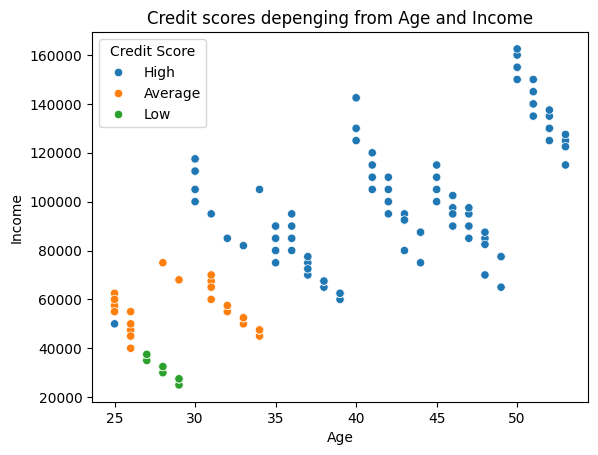

In [10]:
sns.scatterplot(x=data['Age'], y=data['Income'], hue=data['Credit Score'])
plt.title('Credit scores depenging from Age and Income')
plt.show()

✅Code data

In [11]:
data['Education'].unique()

array(["Bachelor's Degree", "Master's Degree", 'Doctorate',
       'High School Diploma', "Associate's Degree"], dtype=object)

In [12]:
data['Credit Score'].unique()

array(['High', 'Average', 'Low'], dtype=object)

In [13]:
data_prep = data.copy()

In [14]:
# 
data_prep['Gender'].replace({'Female' : 0, 'Male': 1}, inplace=True)
data_prep['Gender'] = data_prep['Gender'].astype(int)
# 
data_prep['Education'].replace({
    "High School Diploma": 1, "Associate's Degree": 2,
    "Bachelor's Degree": 3, "Master's Degree": 4,
    "Doctorate": 5}, inplace=True)
data_prep['Education'] = data_prep['Education'].astype(int)
# 
data_prep['Marital Status'].replace({'Single': 0, 'Married': 1}, inplace=True)
data_prep['Marital Status'] = data_prep['Marital Status'].astype(int)
# 
data_prep['Home Ownership'].replace({'Rented': 0, 'Owned': 1}, inplace=True)
data_prep['Home Ownership'] = data_prep['Home Ownership'].astype(int)
# 
data_prep['Credit Score'].replace({'Low': 0, 'Average': 1, 'High': 2}, inplace=True)
data_prep['Credit Score'] = data_prep['Credit Score'].astype(int)

In [15]:
data_prep.head()

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25,0,50000,3,0,0,0,2
1,30,1,100000,4,1,2,1,2
2,35,0,75000,5,1,1,1,2
3,40,1,125000,1,0,0,1,2
4,45,0,100000,3,1,3,1,2


✅Train and see on result of our model

In [16]:
y = data_prep['Credit Score']
X = data_prep.drop(['Credit Score'], axis=1)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

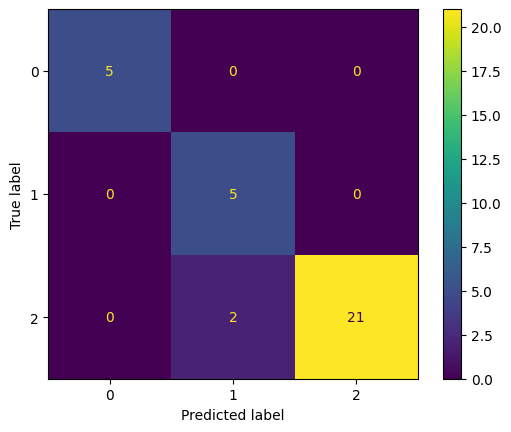

In [18]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
tree_pred = tree.predict(X_test)
cf_matrix = confusion_matrix(y_test, tree_pred)
disp = ConfusionMatrixDisplay(cf_matrix)
disp.plot()
plt.show()

In [19]:
print(classification_report(y_test, tree_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.71      1.00      0.83         5
           2       1.00      0.91      0.95        23

    accuracy                           0.94        33
   macro avg       0.90      0.97      0.93        33
weighted avg       0.96      0.94      0.94        33



In [20]:
# create tree for DecisionBoundaryDisplay
tree_b = DecisionTreeClassifier()
tree_b.fit(X[['Age', 'Income']], y)

DecisionTreeClassifier()

In [21]:
# create display range
x_min, x_max = X['Age'].min() - 1, X['Age'].max() + 1
y_min, y_max = X['Income'].min() - 1, X['Income'].max() + 1
# DecisionBoundaryDisplay takes only meshgrid objects
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

In [22]:
# np.c_ - Translates slice objects to concatenation along the second axis.
Z = tree_b.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

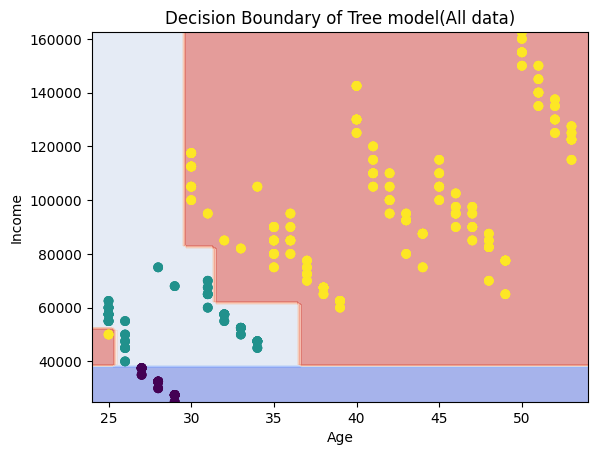

In [23]:
display = DecisionBoundaryDisplay.from_estimator(tree_b, X[['Age', 'Income']], response_method='predict', cmap='coolwarm', alpha=0.5)
plt.scatter(X['Age'], X['Income'], c=y)
plt.scatter(X['Age'], X['Income'], c=y)
plt.scatter(X['Age'], X['Income'], c=y)
plt.title('Decision Boundary of Tree model(All data)')
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()